**ONLINE RETAIL STORE**


 **PROBLEM STATEMENT:**

An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same

**DATASET OVERVIEW:**

1.Online retail is a transactional data collection comprising all transactions for a UK-based and registered online retail non-store between 01/12/2010 and 09/12/2011. The business primarily offers distinctive all-occasion gifts. Many of the firm's clients are wholesalers.

2.The size of this dataset is about 541909 rows and 8 columns (invoice number, Stock code, Description, Quantity, Invoice date, Unit price, Customer ID)

3.We had performed Unsupervised learning algorithms on this dataset like K-Means and Hierarchical clustering

**FEATURE INFORMATION:**

_InvoiceNo:_ Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

_StockCode:_ Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

_Description:_ Product (item) name. Nominal.

_Quantity:_ The quantities of each product (item) per transaction. Numeric.

_InvoiceDate:_ Invoice Date and time. Numeric, the day and time when each transaction was generated.

_UnitPrice:_ Unit price. Numeric, Product price per unit in sterling.

_CustomerID:_ Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

_Country:_ Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from  sklearn.preprocessing import LabelEncoder


In [ ]:
# Read the csv file
data = pd.read_csv("/content/OnlineRetail.csv",parse_dates = ['InvoiceDate'],encoding = 'unicode_escape',na_values=['?','??'])

In [ ]:
# Dataset Info summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87742 entries, 0 to 87741
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    87742 non-null  object        
 1   StockCode    87742 non-null  object        
 2   Description  87454 non-null  object        
 3   Quantity     87742 non-null  int64         
 4   InvoiceDate  87742 non-null  datetime64[ns]
 5   UnitPrice    87742 non-null  float64       
 6   CustomerID   55910 non-null  float64       
 7   Country      87742 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.4+ MB


In [ ]:
# Counting missing values
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      288
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     31832
Country            0
dtype: int64

In [ ]:
#Counting NA Values
data.isna().sum()

InvoiceNo          0
StockCode          0
Description      288
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     31832
Country            0
dtype: int64

In [ ]:
#Drop Na Values
data.dropna(inplace=True)

In [ ]:
# Dataset Info Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55910 entries, 0 to 87648
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    55910 non-null  object        
 1   StockCode    55910 non-null  object        
 2   Description  55910 non-null  object        
 3   Quantity     55910 non-null  int64         
 4   InvoiceDate  55910 non-null  datetime64[ns]
 5   UnitPrice    55910 non-null  float64       
 6   CustomerID   55910 non-null  float64       
 7   Country      55910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# checking the null values again (Validating)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#drop invoice number,Stockcode,Description
data.drop(['StockCode','Description'],axis=1,inplace=True)

In [ ]:
# Dataset info summary
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55910 entries, 0 to 87648
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Quantity     55910 non-null  int64         
 1   InvoiceDate  55910 non-null  datetime64[ns]
 2   UnitPrice    55910 non-null  float64       
 3   CustomerID   55910 non-null  float64       
 4   Country      55910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
# Extracting year frim Invou=iceDate Column
data['year'] = data['InvoiceDate'].apply(lambda x: x.year)

In [ ]:
# Extracting month, week frim Invou=iceDate Column
data['month'] = data['InvoiceDate'].apply(lambda x:x.month)
data['week'] = data['InvoiceDate'].apply(lambda x:x.week)

In [ ]:
# Dispays first five rows by default
data.head()

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  year  \
0         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2         8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   

   month  week  
0     12    48  
1     12    48  
2     12    48  
3     12    48  
4     12    48

In [ ]:
# Counting Unique Values
data.nunique()

Quantity        191
InvoiceDate    3146
UnitPrice       189
CustomerID     1516
Country          26
year              2
month             3
week             10
dtype: int64

In [ ]:
# Calculate Total Purchase
data['Total_purchase'] = data['Quantity']*data['UnitPrice']

In [ ]:
# Displays first five lines
data.head()

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  year  \
0         6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2         8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4         6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   

   month  week  Total_purchase  
0     12    48           15.30  
1     12    48           20.34  
2     12    48           22.00  
3     12    48           20.34  
4     12    48           20.34

In [ ]:
# Check if there are any negative values in quantty/unitprice
data[data['Quantity']<0]

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
141          -1 2010-12-01 09:41:00      27.50     14527.0  United Kingdom   
154          -1 2010-12-01 09:49:00       4.65     15311.0  United Kingdom   
235         -12 2010-12-01 10:24:00       1.65     17548.0  United Kingdom   
236         -24 2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
237         -24 2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
...         ...                 ...        ...         ...             ...   
87603        -5 2011-02-11 10:49:00      10.95     14441.0  United Kingdom   
87604        -1 2011-02-11 10:50:00      16.95     18118.0  United Kingdom   
87634       -36 2011-02-11 11:24:00       0.85     18087.0  United Kingdom   
87635       -12 2011-02-11 11:24:00       0.85     18087.0  United Kingdom   
87648        -1 2011-02-11 11:44:00      12.75     15044.0  United Kingdom   

       year  month  week  Total_purchase  
141    2010     12    48          -27.50  
154    2010     12    48           -4.65  
235    2010     12    48          -19.80  
236    2010     12    48           -6.96  
237    2010     12    48           -6.96  
...     ...    ...   ...             ...  
87603  2011      2     6          -54.75  
87604  2011      2     6          -16.95  
87634  2011      2     6          -30.60  
87635  2011      2     6          -10.20  
87648  2011      2     6          -12.75  

[1565 rows x 9 columns]

In [ ]:
# Drop the negative values in Quantity
data.drop(data[data['Quantity']<0].index,axis=0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54345 entries, 0 to 87647
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Quantity        54345 non-null  int64         
 1   InvoiceDate     54345 non-null  datetime64[ns]
 2   UnitPrice       54345 non-null  float64       
 3   CustomerID      54345 non-null  float64       
 4   Country         54345 non-null  object        
 5   year            54345 non-null  int64         
 6   month           54345 non-null  int64         
 7   week            54345 non-null  int64         
 8   Total_purchase  54345 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 4.1+ MB


In [ ]:
# Check negative values in unitprice
data[data['UnitPrice']<0]

Empty DataFrame
Columns: [Quantity, InvoiceDate, UnitPrice, CustomerID, Country, year, month, week, Total_purchase]
Index: []

In [ ]:
# Check negative values in Total Purchase
data[data['Total_purchase']<0]

Empty DataFrame
Columns: [Quantity, InvoiceDate, UnitPrice, CustomerID, Country, year, month, week, Total_purchase]
Index: []

In [ ]:
# lets check the customer with highest purchase
customer_highest_purchase = data.groupby(['CustomerID'])['Total_purchase'].sum().sort_values(ascending=False)
customer_highest_purchase

CustomerID
12346.0    77183.60
18102.0    38370.09
14646.0    36374.84
15749.0    22998.40
15061.0    22668.91
             ...   
17816.0       16.21
15823.0       15.00
15885.0       15.00
16882.0        9.90
16554.0        0.85
Name: Total_purchase, Length: 1450, dtype: float64

In [ ]:
# lets check the sales over years for 2010
data_2010 = data[data['year']==2010].sort_values(['InvoiceDate'])
data_2010

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
0             6 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1             6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2             8 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3             6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4             6 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...         ...                 ...        ...         ...             ...   
42389         3 2010-12-23 16:06:00       1.65     18116.0  United Kingdom   
42388         1 2010-12-23 16:06:00       1.65     18116.0  United Kingdom   
42387         1 2010-12-23 16:06:00       1.65     18116.0  United Kingdom   
42385         2 2010-12-23 16:06:00       1.69     18116.0  United Kingdom   
42452         2 2010-12-23 16:06:00       1.25     18116.0  United Kingdom   

       year  month  week  Total_purchase  
0      2010     12    48           15.30  
1      2010     12    48           20.34  
2      2010     12    48           22.00  
3      2010     12    48           20.34  
4      2010     12    48           20.34  
...     ...    ...   ...             ...  
42389  2010     12    51            4.95  
42388  2010     12    51            1.65  
42387  2010     12    51            1.65  
42385  2010     12    51            3.38  
42452  2010     12    51            2.50  

[26160 rows x 9 columns]

In [ ]:
data_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26160 entries, 0 to 42452
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Quantity        26160 non-null  int64         
 1   InvoiceDate     26160 non-null  datetime64[ns]
 2   UnitPrice       26160 non-null  float64       
 3   CustomerID      26160 non-null  float64       
 4   Country         26160 non-null  object        
 5   year            26160 non-null  int64         
 6   month           26160 non-null  int64         
 7   week            26160 non-null  int64         
 8   Total_purchase  26160 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 2.0+ MB


In [ ]:
data_2010=data_2010.groupby('InvoiceDate').sum()

<ipython-input-24-37985cfdcf2e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2010=data_2010.groupby('InvoiceDate').sum()


In [ ]:
# Import plotly.express library
import plotly.express as px

In [ ]:
# Assigning Unique Invoice Dates for 2010 Data
data_2010['InvoiceDate'] = data[data['year']==2010]['InvoiceDate'].unique()

In [ ]:
data_2010

Quantity  UnitPrice  CustomerID    year  month  week  \
InvoiceDate                                                                 
2010-12-01 08:26:00        40      27.37    124950.0   14070     84   336   
2010-12-01 08:28:00        12       3.70     35700.0    4020     24    96   
2010-12-01 08:34:00        98      77.34    208752.0   32160    192   768   
2010-12-01 08:35:00         3       5.95     13047.0    2010     12    48   
2010-12-01 08:45:00       449      55.29    251660.0   40200    240   960   
...                       ...        ...         ...     ...    ...   ...   
2010-12-23 14:40:00        65      56.78    306220.0   40200    240  1020   
2010-12-23 14:58:00       108      92.00    223665.0   30150    180   765   
2010-12-23 15:16:00       387      45.87    221984.0   28140    168   714   
2010-12-23 15:32:00         1       6.95     12748.0    2010     12    51   
2010-12-23 16:06:00       178     221.31   1612324.0  178890   1068  4539   

                     Total_purchase         InvoiceDate  
InvoiceDate                                              
2010-12-01 08:26:00          139.12 2010-12-01 08:26:00  
2010-12-01 08:28:00           22.20 2010-12-01 08:28:00  
2010-12-01 08:34:00          348.78 2010-12-01 08:34:00  
2010-12-01 08:35:00           17.85 2010-12-01 08:35:00  
2010-12-01 08:45:00          855.86 2010-12-01 08:45:00  
...                             ...                 ...  
2010-12-23 14:40:00          256.61 2010-12-23 14:40:00  
2010-12-23 14:58:00          289.85 2010-12-23 14:58:00  
2010-12-23 15:16:00          968.77 2010-12-23 15:16:00  
2010-12-23 15:32:00            6.95 2010-12-23 15:32:00  
2010-12-23 16:06:00          353.69 2010-12-23 16:06:00  

[1293 rows x 8 columns]

<Axes: xlabel='InvoiceDate', ylabel='Total_purchase'>

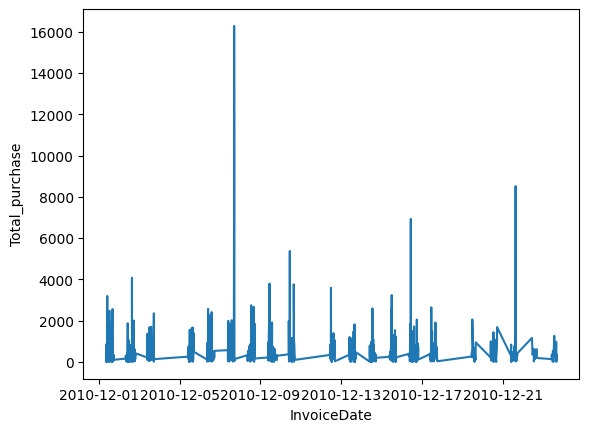

In [ ]:
# Line Plot of Total Purchase Over Time for 2010 Data
sns.lineplot(x=data_2010['InvoiceDate'],y=data_2010['Total_purchase'])

<Axes: xlabel='year'>

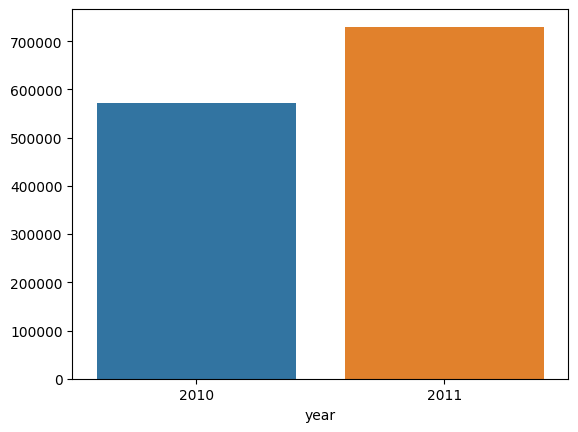

In [ ]:
# Bar Plot of Total Purchase by Year
year_data= data.groupby('year')['Total_purchase'].sum()
sns.barplot(x=year_data.index,y=year_data.values)

In [ ]:
# Lets see the country which has most customers
country_data = data.groupby('Country')['CustomerID'].count()
country_data

Country
Australia            169
Austria               29
Belgium              164
Channel Islands       47
Cyprus               191
Denmark               20
EIRE                 605
Finland               28
France              1259
Germany             1381
Greece                32
Iceland               60
Italy                148
Japan                150
Lebanon               45
Lithuania             35
Netherlands          327
Norway               164
Poland                61
Portugal             234
Singapore             56
Spain                540
Sweden                72
Switzerland          235
United Kingdom     48293
Name: CustomerID, dtype: int64

**DATA VISUALIZATION**
1. *Bar plot:* Top 5 countries with the most sales.

2. *Bar plot:* Distribution of transactions by month.

3. *Bar plot:* Top 5 countries with the most customers.

4. *Bar plot:* Sales per year.

5. *Bar plot:* Top 5 items with the highest sales.

6. *Bar plot:* Transaction status (successful vs. cancelled).

Text(0.5, 1.0, 'Top 5 Countries with most sales ')

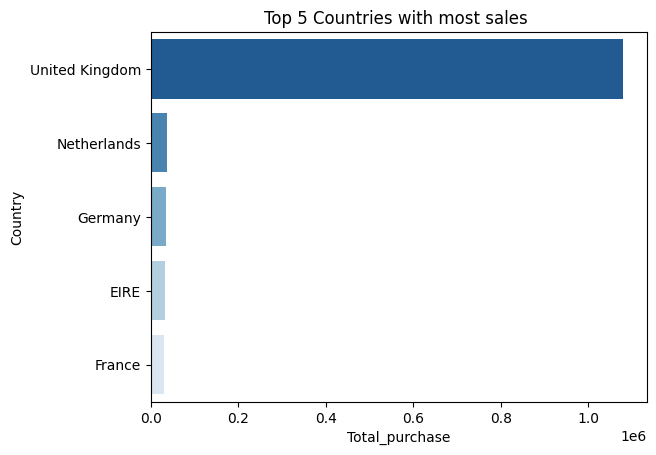

In [ ]:
# 1. Top 5 countries with the most sales.
total_sales_per_country = data.groupby('Country')['Total_purchase'].sum().reset_index().sort_values('Total_purchase',ascending=False)
sns.barplot(data=total_sales_per_country.head(5), x='Total_purchase',y='Country',palette = 'Blues_r')
plt.title("Top 5 Countries with most sales ")

<BarContainer object of 36 artists>

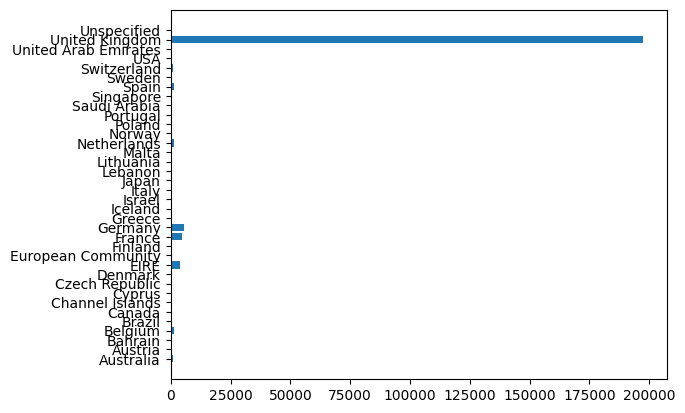

In [ ]:
plt.barh(y=country_data.index,width=country_data.values)

We have most of the customers from UK

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

Text(0.5, 1.0, 'Sales per Month')

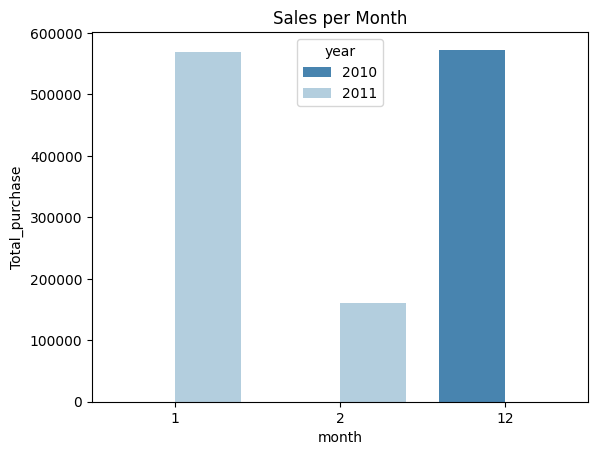

In [ ]:
total_sales_per_month = data.groupby(['month','year'])['Total_purchase'].sum().reset_index()
sns.barplot(data=total_sales_per_month, y='Total_purchase',x='month',hue='year',palette = 'Blues_r')
plt.title("Sales per Month")

In [ ]:
#Detect outlier
px.box(data['UnitPrice'])

In [ ]:
data[data['UnitPrice']>7.5]

Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
5              2 2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
16             2 2010-12-01 08:34:00       9.95     13047.0  United Kingdom   
19             4 2010-12-01 08:34:00       7.95     13047.0  United Kingdom   
20             4 2010-12-01 08:34:00       7.95     13047.0  United Kingdom   
45             3 2010-12-01 08:45:00      18.00     12583.0          France   
...          ...                 ...        ...         ...             ...   
313677         1 2011-08-25 15:04:00      12.75     12624.0          France   
313690         2 2011-08-25 15:04:00      18.00     12624.0          France   
313691         2 2011-08-25 15:04:00      11.95     14055.0  United Kingdom   
313697         8 2011-08-25 15:04:00       8.50     14055.0  United Kingdom   
313712         1 2011-08-25 15:09:00      12.75     12748.0  United Kingdom   

        year  month  week  Total_purchase  
5       2010     12    48           15.30  
16      2010     12    48           19.90  
19      2010     12    48           31.80  
20      2010     12    48           31.80  
45      2010     12    48           54.00  
...      ...    ...   ...             ...  
313677  2011      8    34           12.75  
313690  2011      8    34           36.00  
313691  2011      8    34           23.90  
313697  2011      8    34           68.00  
313712  2011      8    34           12.75  

[21522 rows x 9 columns]

Since there are a lots of outliers and we cannot remove them, so we will use Kmedians or DBscan to perform clustering since these models are more robust and wont be affescted by outliers

In [ ]:
from sklearn import preprocessing

In [ ]:
#lets normalize our data
data_norm = data.copy()
scaler = preprocessing.MinMaxScaler()
data_norm[['UnitPrice','Quantity','Total_purchase']] = scaler.fit_transform(data_norm[['UnitPrice','Quantity','Total_purchase']])

In [ ]:
data_norm.describe()

Quantity      UnitPrice     CustomerID           year  \
count  222974.000000  222974.000000  222974.000000  222974.000000   
mean        0.000170       0.000393   15287.284930    2010.882677   
std         0.002205       0.002693    1725.343824       0.321806   
min         0.000000       0.000000   12346.000000    2010.000000   
25%         0.000013       0.000154   13870.000000    2011.000000   
50%         0.000067       0.000239   15159.000000    2011.000000   
75%         0.000148       0.000461   16814.000000    2011.000000   
max         1.000000       1.000000   18287.000000    2011.000000   

               month           week  Total_purchase  
count  222974.000000  222974.000000   222974.000000  
mean        5.505646      21.727457        0.000300  
std         3.156245      13.455586        0.002561  
min         1.000000       1.000000        0.000000  
25%         3.000000      11.000000        0.000065  
50%         5.000000      20.000000        0.000165  
75%         7.000000      30.000000        0.000257  
max        12.000000      51.000000        1.000000

In [ ]:
# first i will try to cluster the categorical data customerid and country
data_cat_cluster = data[['CustomerID','Country','Total_purchase']]
data_cat_cluster

CustomerID         Country  Total_purchase
0          17850.0  United Kingdom           15.30
1          17850.0  United Kingdom           20.34
2          17850.0  United Kingdom           22.00
3          17850.0  United Kingdom           20.34
4          17850.0  United Kingdom           20.34
...            ...             ...             ...
313719     12748.0  United Kingdom            4.20
313720     12748.0  United Kingdom            1.90
313721     12748.0  United Kingdom            2.95
313722     18075.0  United Kingdom           39.60
313723     18075.0  United Kingdom           35.40

[222974 rows x 3 columns]

**DATA PREPARATION:**
We are going to analysis the Customers based on below 3 factors:

*R (Recency):* Number of days since last purchase

*F (Frequency):* Number of tracsactions

*M (Monetary):* Total amount of transactions (revenue contributed)

In [ ]:
# New Attribute : Monetary

data['Amount'] = data['Quantity']*data['UnitPrice']
rfm_m = data.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

CustomerID    Amount
0     12346.0  77183.60
1     12347.0   1187.18
2     12348.0   1120.24
3     12350.0    334.40
4     12356.0   2271.62

In [ ]:
# New Attribute : Frequency

rfm_f = data.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

CustomerID  Frequency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

CustomerID    Amount  Frequency
0     12346.0  77183.60          2
1     12347.0   1187.18        182
2     12348.0   1120.24         31
3     12350.0    334.40         17
4     12356.0   2271.62         59

In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
# Compute the maximum date to know the last transaction date

max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Compute the difference between max date and transaction date

data['Diff'] = max_date - data['InvoiceDate']
data.head()

InvoiceNo  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0    536365         6 2010-12-01 08:26:00       2.55     17850.0   
1    536365         6 2010-12-01 08:26:00       3.39     17850.0   
2    536365         8 2010-12-01 08:26:00       2.75     17850.0   
3    536365         6 2010-12-01 08:26:00       3.39     17850.0   
4    536365         6 2010-12-01 08:26:00       3.39     17850.0   

          Country              Diff  
0  United Kingdom 373 days 04:24:00  
1  United Kingdom 373 days 04:24:00  
2  United Kingdom 373 days 04:24:00  
3  United Kingdom 373 days 04:24:00  
4  United Kingdom 373 days 04:24:00

In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = data.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

CustomerID              Diff
0     12346.0 325 days 02:33:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00

In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

CustomerID  Diff
0     12346.0   325
1     12347.0     1
2     12348.0    74
3     12349.0    18
4     12350.0   309

In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

CustomerID    Amount  Frequency  Recency
0     12346.0  77183.60          2      325
1     12347.0   1187.18        182        1
2     12348.0   1120.24         31       74
3     12350.0    334.40         17      309
4     12356.0   2271.62         59       22

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(1416, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

Amount  Frequency   Recency
0  0.827625   0.297080 -0.835095
1  0.732147  -0.648504 -0.255764
2 -0.388710  -0.736174  1.609206
3  2.374381  -0.473163 -0.668438
4  2.538108   0.747955 -0.787478

MODEL BUILDING
1.K-Means Clustering:

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

2.The algorithm works as follows:

First we initialize k points, called means, randomly.

We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.

We repeat the process for a given number of iterations and at the end, we have our clusters.

In [ ]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 3, ..., 1, 3, 2], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Intertia')

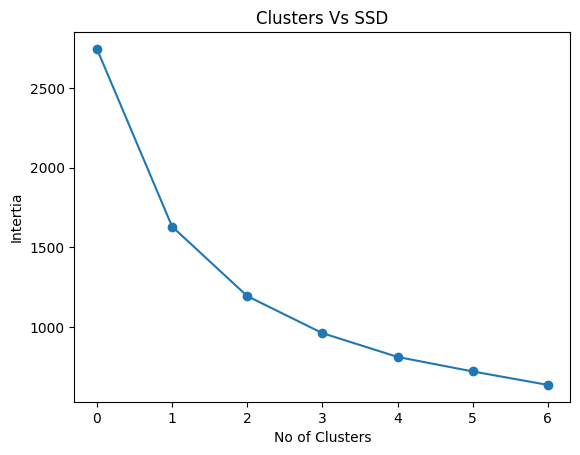

In [ ]:
# Elbow-curve/SSD to find the optimal number of clusters

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd, marker='o')
plt.title('Clusters Vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.4344689002551375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.5122296291024386


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.5218156243200024
For n_clusters=5, the silhouette score is 0.4442330541875521


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.43786767954253614
For n_clusters=7, the silhouette score is 0.4060263399785504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.41634096549268207


In [ ]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [ ]:
 kmeans.labels_

array([2, 2, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

CustomerID   Amount  Frequency  Recency  Cluster_Id
1     12347.0  1187.18        182        1           2
2     12348.0  1120.24         31       74           2
3     12350.0   334.40         17      309           1
4     12356.0  2271.62         59       22           3
5     12359.0  2386.41        254        7           3

<Axes: xlabel='Cluster_Id', ylabel='Amount'>

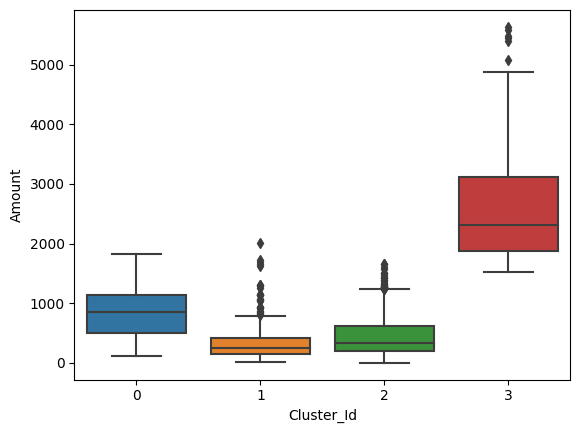

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

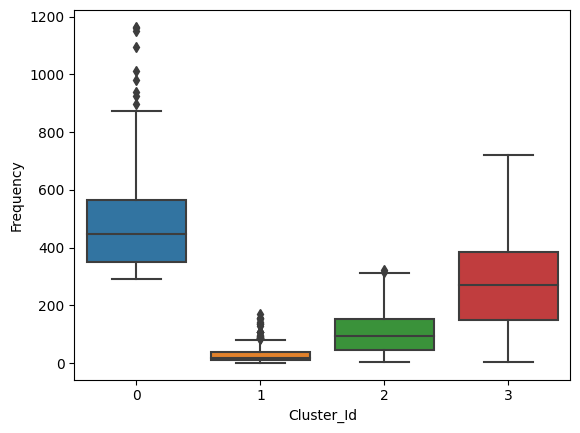

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

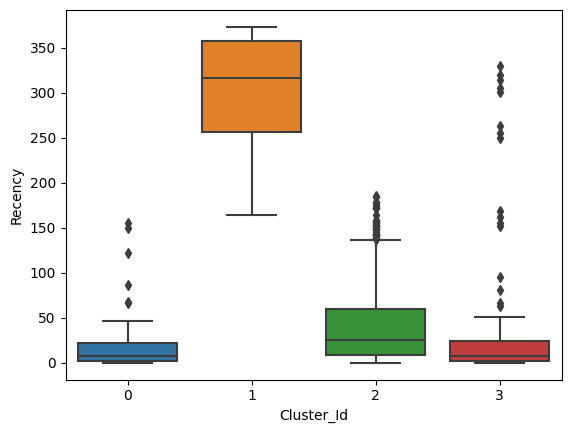

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

FINAL ANALYSIS
Inference:

K-Means Clustering with 4 Cluster Ids:

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster Id 0 are frequent buyers.

Customers with cluster Id 3 are spend a lot when compared with other Ids

Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.